Data visualization
Subtask:
Visualize key relationships and distributions within the dataset to gain insights into patient attendance.

In [2]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('noshowappointments.csv') # Load your data into a DataFrame

# 1. Rename Columns (lowercase, replace dashes/spaces)
df.columns = [col.strip().lower().replace('-', '_').replace(' ', '_') for col in df.columns]

# 2. Convert ScheduledDay and AppointmentDay to datetime (updated)
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

# 3. Remove invalid age values
df = df[df['age'] >= 0]



Text(0.5, 1.0, 'Distribution of No-show')

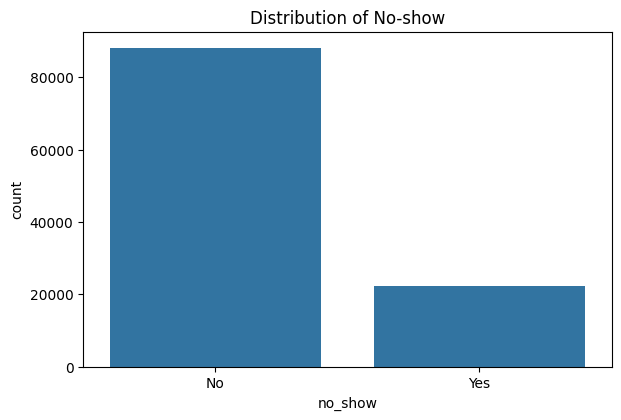

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

# 1. Distribution of 'No-show'
plt.subplot(4, 2, 1)
# Changed 'No-show' to 'no_show' to match the lowercase column name
sns.countplot(x='no_show', data=df)
plt.title('Distribution of No-show')




Text(0.5, 1.0, 'Age Distribution by No-show')

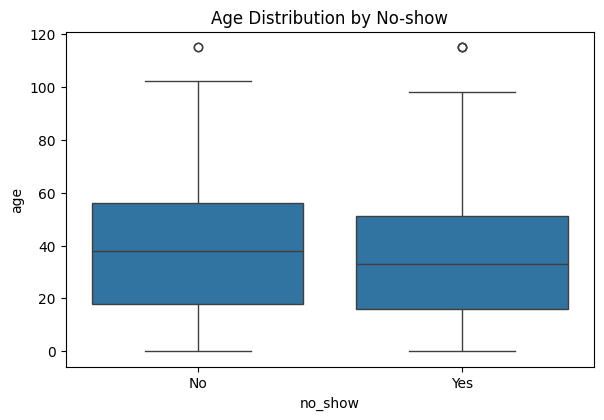

In [ ]:
plt.figure(figsize=(15, 20))

# 2. Relationship between Age and No-show
plt.subplot(4, 2, 2)
# Changed 'No-show' to 'no_show' to match the lowercase column name
sns.boxplot(x='no_show', y='age', data=df) # Changed 'Age' to 'age'
plt.title('Age Distribution by No-show')




Text(0.5, 1.0, 'No-show by Gender')

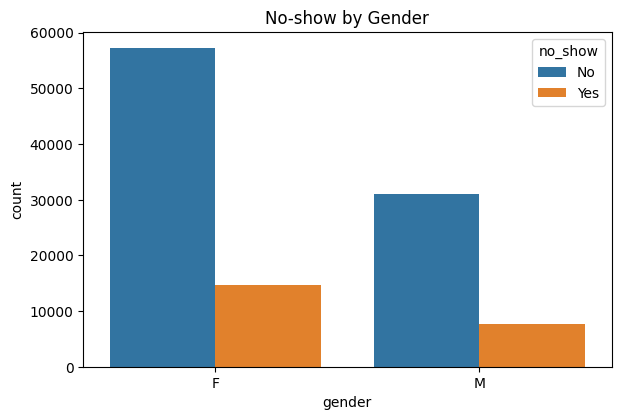

In [ ]:
plt.figure(figsize=(15, 20))
# 3. Relationship between Gender and No-show
plt.subplot(4, 2, 3)
# Changed 'No-show' to 'no_show' to match the lowercase column name
sns.countplot(x='gender', hue='no_show', data=df) # Changed 'Gender' to 'gender'
plt.title('No-show by Gender')



Text(0.5, 1.0, 'No-show by Scholarship')

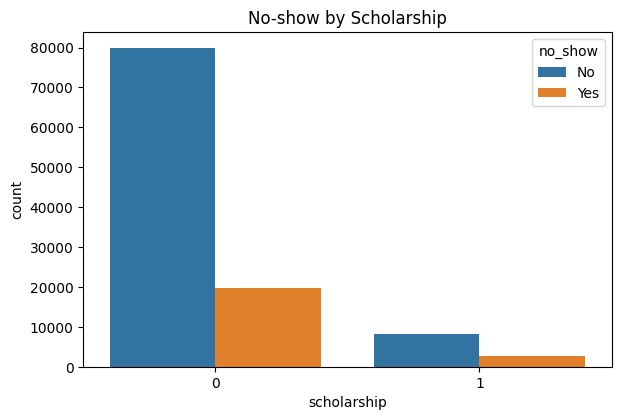

In [ ]:
plt.figure(figsize=(15, 20))
# 4. Relationship between Scholarship and No-show
plt.subplot(4, 2, 4)
# Changed 'No-show' to 'no_show' and 'Scholarship' to 'scholarship'
sns.countplot(x='scholarship', hue='no_show', data=df)
plt.title('No-show by Scholarship')



Text(0.5, 1.0, 'No-show by SMS_received')

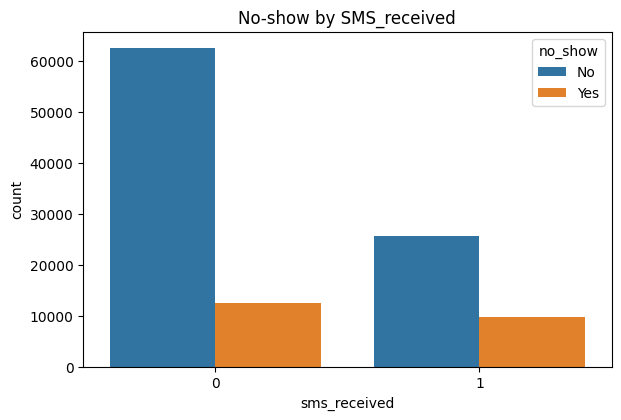

In [ ]:
plt.figure(figsize=(15, 20))
# 5. Impact of SMS_received
plt.subplot(4, 2, 5)
# Changed 'No-show' to 'no_show' and 'SMS_received' to 'sms_received'
sns.countplot(x='sms_received', hue='no_show', data=df)
plt.title('No-show by SMS_received')



Text(0.5, 1.0, 'No-show by Neighbourhood (Top 10)')

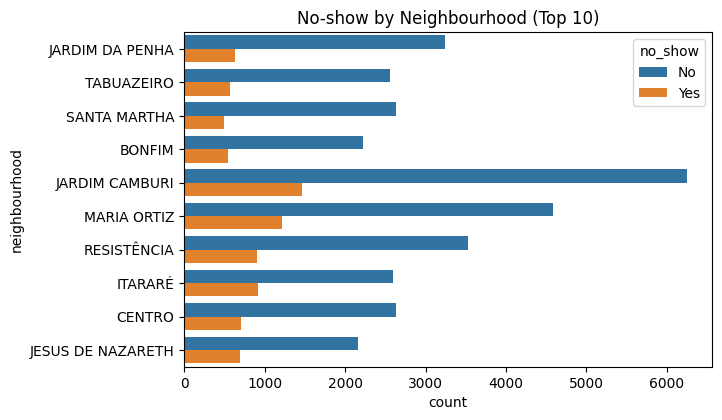

In [ ]:

plt.figure(figsize=(15, 20))
# 6. Neighbourhood Analysis (limited to top 10 for visualization)
plt.subplot(4, 2, 6)
top_10_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10).index # Changed 'Neighbourhood' to 'neighbourhood'
df_top_10 = df[df['neighbourhood'].isin(top_10_neighbourhoods)] # Changed 'Neighbourhood' to 'neighbourhood'
sns.countplot(y='neighbourhood', hue='no_show', data=df_top_10) # Changed 'Neighbourhood' to 'neighbourhood', 'No-show' to 'no_show'
plt.title('No-show by Neighbourhood (Top 10)')



Text(0.5, 1.0, 'Distribution of Time Difference')

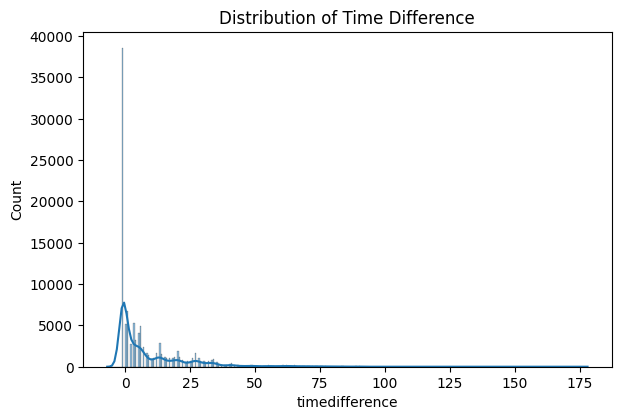

In [ ]:
# Calculate the time difference before plotting
df['timedifference'] = (df['appointmentday'] - df['scheduledday']).dt.days

plt.figure(figsize=(15, 20))

# 7. Time Difference Analysis
plt.subplot(4, 2, 7)
sns.histplot(df['timedifference'], kde=True)
plt.title('Distribution of Time Difference')



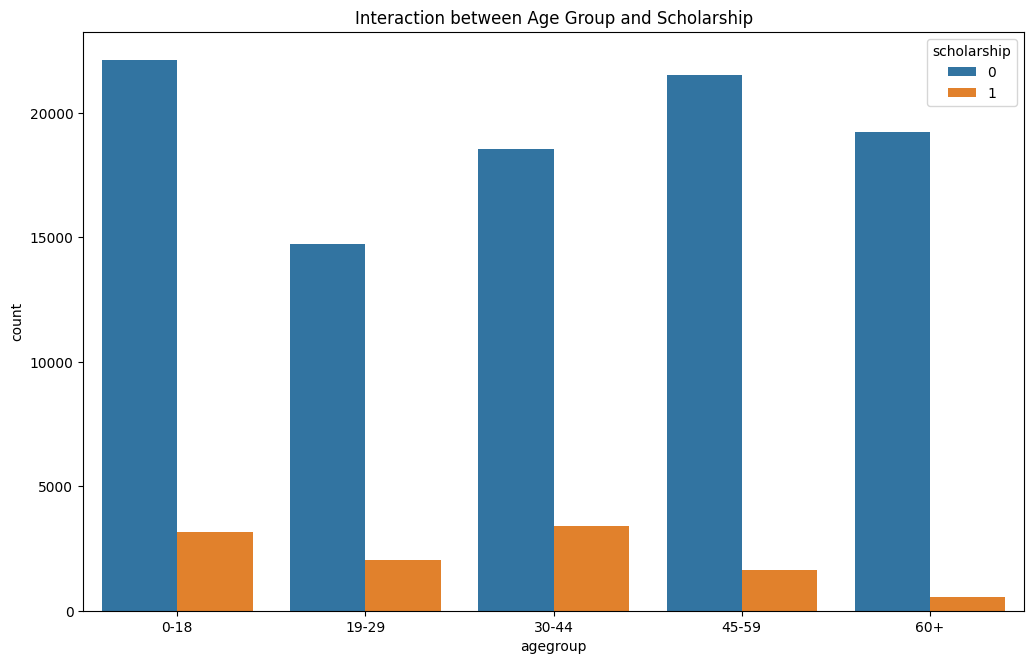

In [ ]:
# Increase figure size for better visibility
plt.figure(figsize=(20, 25))
# 8. Age Group and Scholarship Interaction
plt.subplot(4, 2, 8)
# Changed 'AgeGroup' to 'agegroup' and 'Scholarship' to 'scholarship'
# Create age group bins if 'agegroup' column doesn't exist
if 'agegroup' not in df.columns:
    df['agegroup'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 120],
                           labels=['0-18', '19-29', '30-44', '45-59', '60+'])
sns.countplot(x='agegroup', hue='scholarship', data=df)
plt.title('Interaction between Age Group and Scholarship')

plt.tight_layout()
plt.show()

In [4]:
import os # Import the os module

# Create the directory if it doesn't exist
os.makedirs('output/figures', exist_ok=True)

# Save the figure before attempting to download it
plt.savefig('output/figures/filename.png')
plt.tight_layout()
plt.show()

# Instead of downloading, just inform the user about the file location
print(f"The figure has been saved to: output/figures/filename.png")

<Figure size 640x480 with 0 Axes>

The figure has been saved to: output/figures/filename.png
